In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load your trained model
model = load_model('v1.keras')

# Directory containing the test images
test_dir = 'F:/Programming/Project/tldc/Dataset/test_data'

# Create an ImageDataGenerator for preprocessing the test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the test images using the ImageDataGenerator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',  # Assuming you have categorical labels
    shuffle=False  # No need to shuffle for evaluation
)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


Found 199 images belonging to 2 classes.
7/7 [==============================] - 1s 184ms/step - loss: 0.1386 - accuracy: 0.9548
Test loss: 0.13860994577407837
Test accuracy: 0.9547738432884216


7/7 [==============================] - 1s 132ms/step
Precision: 0.9570504174351163
Recall: 0.9547738693467337


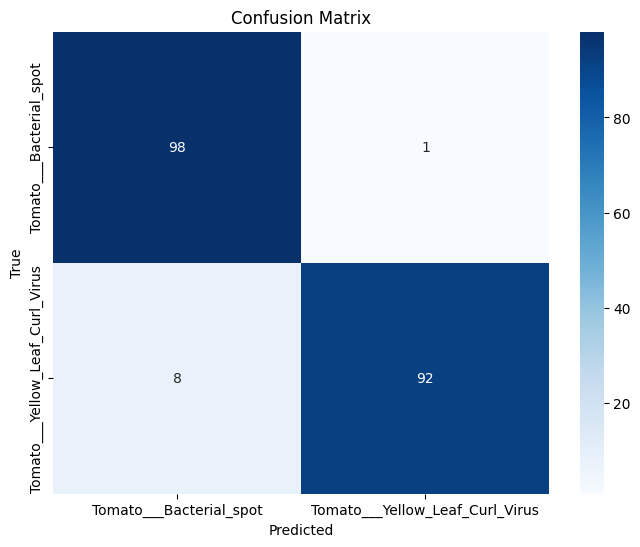

In [10]:
# Get true labels from the test dataset
true_labels = test_generator.classes

# Get predicted probabilities for each class
predicted_probs = model.predict(test_generator)

# Convert predicted probabilities to class predictions
predicted_labels = np.argmax(predicted_probs, axis=1)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')


# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
